<a href="https://colab.research.google.com/github/chonayoung/2020-2-AI/blob/main/code/20190717-%EC%A1%B0%EB%82%98%EC%98%81.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 1. 회귀 문제 : 중고차 가격 예측 문제



In [ ]:
# 필요한 라이브러리 임포트
import numpy as np 
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns 
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression 
from sklearn.metrics import accuracy_score, confusion_matrix, r2_score 
from sklearn.metrics import mean_absolute_error 
from sklearn import preprocessing

csv파일의 전처리 유용 : pandas

데이터 시각화 이용 : matplotlib

머신러닝 라이브러리 : sklearn


In [ ]:
dummy_data = pd.read_csv('/content/drive/MyDrive/2020-2 인공지능응용프로그래밍/train-data.csv')
dummy_data.head()

,Unnamed: 0,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price
0,0,Maruti Wagon R LXI CNG,Mumbai,2010,72000,CNG,Manual,First,26.6 km/kg,998 CC,58.16 bhp,5.0,NaN,1.75
1,1,Hyundai Creta 1.6 CRDi SX Option,Pune,2015,41000,Diesel,Manual,First,19.67 kmpl,1582 CC,126.2 bhp,5.0,NaN,12.50
2,2,Honda Jazz V,Chennai,2011,46000,Petrol,Manual,First,18.2 kmpl,1199 CC,88.7 bhp,5.0,8.61 Lakh,4.50
3,3,Maruti Ertiga VDI,Chennai,2012,87000,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,6.00
4,4,Audi A4 New 2.0 TDI Multitronic,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2 kmpl,1968 CC,140.8 bhp,5.0,NaN,17.74


In [ ]:
#데이터의 row,col 수 확인
print('row : {}, col 수 : {}'.format(dummy_data.shape[0],dummy_data.shape[1]))

row : 6019, col 수 : 14


In [ ]:
# 데이터 전처리

# NaN 결측치 제거
clean_data = dummy_data.copy(deep=True)
# 6019 -> 813
clean_data.dropna('index').shape # (813,14)

# New_Price 컬럼 이상치 확인
print(str(clean_data.New_Price.isna().sum())) # 5195개 na

# New_Price, Unnamed : 0 칼럼 제거
clean_data.drop(columns = ['Unnamed: 0', 'New_Price'], inplace = True)

clean_data.dropna("index", inplace = True)
clean_data = clean_data.reset_index(drop=True)
clean_data.shape # (5975, 12)

5195


(5975, 12)

데이터를 전처리 할 때, 가장 먼저 하는 일 중에 하나는 NaN(결측치)를 확인하고 제거.

NaN을 제거할 때 데이터의 속성을 잘 확인

만약 데이터가 수치 값이라면 NaN에 평균값을 넣어주는 등의 처리를 할 수도 있지만 위치, 이름 등과 같이 어떤 값으로 대체하기 어렵다면 결측치가 있는 row를 아예 제거.

위의 데이터에서 결측치를 제거하였더니 6019개였던 행의 수가 813개가 되어버리므로 데이터의 손실이 너무 많아지게 됨.

그리고 head를 이용하여 데이터의 헤더를 살펴보면 New_Price의 값에 NaN이 굉장히 많다는 것을 확인 할  수 있음. 그래서 New_Price 컬럼 값을 제거

또 Unnamed:0 컬럼도 인덱스를 부여 하는 것외에 정보가 없기 때문에 제거.


In [ ]:
# 차 종류 수 정의

len(np.unique(list(clean_data.Name))) #1855가지
# 차 종별 갯수가 2개 이상인 종류만해도 1034 종
# 모델을 너무 복잡 -> overfitting 초래

# 차종에서 브랜드만 남김
names = list(clean_data.Name)
for i in range(len(names)):
  names[i]=names[i].split(' ',1)[0]
clean_data.Name=names
clean_data.head()

len(np.unique(list(clean_data.Name))) #31 브랜드

31

In [ ]:
#Mileage의 km/kg 제거 Engine의 cc제거, Power의 bhp 제거
#데이터의 단위만 제가 하고 수치만 남겨둠
mileage = list(clean_data.Mileage) 
engine = list (clean_data.Engine) 
power = list(clean_data.Power)

for i in range(len(names)): 
  mileage[i] = mileage[i].split(' ',1)[0]
  engine[i] = engine[i].split(' ',1)[0] 
  power [i] = power[i].split(' ',1)[0]

clean_data.Mileage = mileage 
clean_data.Engine = engine 
clean_data.Power = power 
clean_data.head()

,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,Price
0,Maruti,Mumbai,2010,72000,CNG,Manual,First,26.6,998,58.16,5.0,1.75
1,Hyundai,Pune,2015,41000,Diesel,Manual,First,19.67,1582,126.2,5.0,12.50
2,Honda,Chennai,2011,46000,Petrol,Manual,First,18.2,1199,88.7,5.0,4.50
3,Maruti,Chennai,2012,87000,Diesel,Manual,First,20.77,1248,88.76,7.0,6.00
4,Audi,Coimbatore,2013,40670,Diesel,Automatic,Second,15.2,1968,140.8,5.0,17.74


In [ ]:
# 각 칼럼 데이터형 확인
clean_data["Price"] = clean_data["Price"].astype( float) 
clean_data["Kilometers_Driven"] = clean_data["Kilometers_Driven"].astype( float) 
clean_data["Mileage"] = clean_data["Mileage"].astype( float) 
clean_data["Engine"] = clean_data["Engine"].astype( float) 
(clean_data.dtypes)

Name                  object
Location              object
Year                   int64
Kilometers_Driven    float64
Fuel_Type             object
Transmission          object
Owner_Type            object
Mileage              float64
Engine               float64
Power                 object
Seats                float64
Price                float64
dtype: object

In [ ]:
# 칼럼 도메인 확인
np.unique(list(clean_data.Name))
np.unique(list(clean_data.Location))
np.unique(list(clean_data.Year))
np.unique(list(clean_data.Fuel_Type))
np.unique(list(clean_data.Transmission))
np.unique(list(clean_data.Owner_Type))
np.unique(list(clean_data.Seats))
#array([ 2.,  4.,  5.,  6.,  7.,  8.,  9., 10.])
clean_data=clean_data[clean_data.Seats != 0] # Seats = 0인 것 제거
print(clean_data.shape) # 5975 -> 5974

(5872, 12)


In [ ]:
np.unique(list(clean_data.Power))
#Power의 null 제거 -> float
idx = []
lt = list(clean_data['Power'])
for i in range(len(lt)):
  if(lt[i]=='null'):
    idx.append(i)
clean_data = clean_data.drop(idx)
clean_data = clean_data.reset_index(drop = True)
clean_data['Power'] = clean_data['Power'].astype(float)

In [ ]:
# 카테고리 별로 분류 Name, Location, Owner_Type, Seats
# 데이터 프레임 재정의 (one-hot encoding)
# Name : Hyundai, Audi, BMW ... => Name_Hyundai, Name_Audi, Name_BMW

clean_data['Year']= pd.Categorical(clean_data['Year'])
clean_data['Seats']= pd.Categorical(clean_data['Seats'])
clean_data = pd.get_dummies(clean_data, prefix_sep='_', drop_first=True)
clean_data.head()

,Kilometers_Driven,Mileage,Engine,Power,Price,Name_Audi,Name_BMW,Name_Bentley,Name_Chevrolet,Name_Datsun,Name_Fiat,Name_Force,Name_Ford,Name_Honda,Name_Hyundai,Name_ISUZU,Name_Isuzu,Name_Jaguar,Name_Jeep,Name_Lamborghini,Name_Land,Name_Mahindra,Name_Maruti,Name_Mercedes-Benz,Name_Mini,Name_Mitsubishi,Name_Nissan,Name_Porsche,Name_Renault,Name_Skoda,Name_Tata,Name_Toyota,Name_Volkswagen,Name_Volvo,Location_Bangalore,Location_Chennai,Location_Coimbatore,Location_Delhi,Location_Hyderabad,Location_Jaipur,Location_Kochi,Location_Kolkata,Location_Mumbai,Location_Pune,Year_1999,Year_2000,Year_2001,Year_2002,Year_2003,Year_2004,Year_2005,Year_2006,Year_2007,Year_2008,Year_2009,Year_2010,Year_2011,Year_2012,Year_2013,Year_2014,Year_2015,Year_2016,Year_2017,Year_2018,Year_2019,Fuel_Type_Diesel,Fuel_Type_LPG,Fuel_Type_Petrol,Transmission_Manual,Owner_Type_Fourth & Above,Owner_Type_Second,Owner_Type_Third,Seats_4.0,Seats_5.0,Seats_6.0,Seats_7.0,Seats_8.0,Seats_9.0,Seats_10.0
0,72000.0,26.60,998.0,58.16,1.75,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,0,0,0
1,41000.0,19.67,1582.0,126.20,12.50,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,1,0,0,0,0,0
2,46000.0,18.20,1199.0,88.70,4.50,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,0,0,0
3,87000.0,20.77,1248.0,88.76,6.00,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0,0,1,0,0,0
4,40670.0,15.20,1968.0,140.80,17.74,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,1,0,0,1,0,0,0,0,0


In [ ]:
print(clean_data.shape) # 79개의 컬럼 생성확인

(5844, 79)


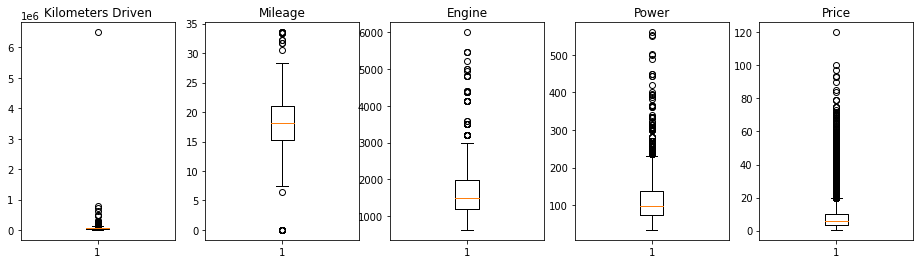

In [ ]:
# Outlier(이상치) 확인
fig, ax = plt.subplots(1,5,figsize=(16,4)) 
ax[0].boxplot(list(clean_data.Kilometers_Driven)) 
ax[0].set_title("Kilometers Driven")

ax[1].boxplot(clean_data.Mileage) 
ax[1].set_title("Mileage")

ax[2].boxplot(clean_data.Engine) 
ax[2].set_title("Engine")

ax[3].boxplot(list (clean_data.Power)) 
ax[3].set_title("Power")

ax[4].boxplot(list(clean_data.Price))
ax[4].set_title("Price")
plt.show() # kilo가 6000000이상인 것으로 확인됨

In [ ]:
 # kilo가 6000000 삭제
 idx = [] 
 It = list(clean_data["Kilometers_Driven"]) 
 for i in range(len(It)): 
   if( It[i] > 1000000):
     idx.append(i) 
clean_data = clean_data.drop(idx) 
clean_data = clean_data.reset_index(drop = True)

In [ ]:
# 데이터 셋 생성
# 전처리를 train으로 만 했기에 훈련셋의 15%를 테스트 셋에 사용

y=clean_data[['Price']].to_numpy()
clean_data=clean_data.drop(columns=['Price'])

x=clean_data.values
columns=clean_data.columns

#Scale (x값만)
scaler = preprocessing.MinMaxScaler()
tmp=scaler.fit_transform(x)
clean_data=pd.DataFrame(tmp)
clean_data.columns=columns

x=clean_data.to_numpy()

#data split
x_train, x_test, y_train, y_test = train_test_split(x,y,train_size=0.85, random_state=1)

In [ ]:
# 모델 구성
def build_mode():
  model = keras.Sequential([
    layers.Dense(64,activation='relu',input_shape=[79]),
    layers.Dense(64,activation='relu'),
    layers.Dense(1)
   ])
  optimizer=tf.keras.optimizers.RMSprop(0.001)
  model.compile(loss='mse', optimizer=optimizer, metrics=['mae','mse']) 
  return model

model=build_mode()
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_3 (Dense)              (None, 64)                5120      
_________________________________________________________________
dense_4 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 65        
Total params: 9,345
Trainable params: 9,345
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history = model.fit(x_train, y_train, epochs=10)

model.evaluate(normd_test_data, test_labels, verbose=2)

ValueError: ignored

여기서부터 막혔음.

참고 자료에서는 keras를 이용하지 않고 sklearn을 이용하여 모델링을 했기에 혼자서 모델을 구성하고 돌릴려고 했으나, 부족한 지식으로 왜 오류나는지 이해를 못했음.

기말고사 끝나고 시간이 되면 좀 더 공부하여 코드를 짜서 깃허브에 올리겠음.

# 2. 분류 문제 : Iris 붓꽃 분류

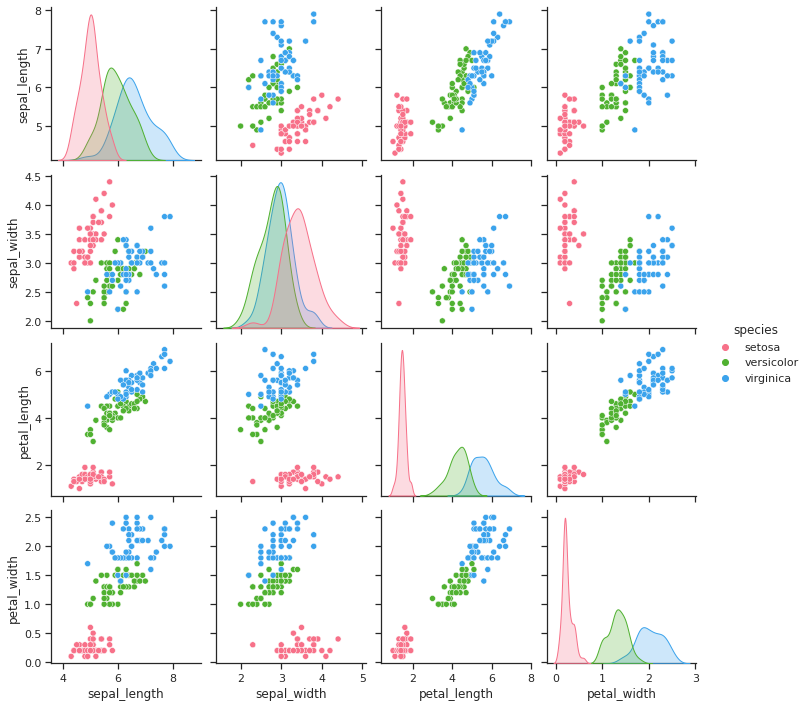

In [ ]:
# 필요 임포트, 데이터 가져오기
%matplotlib inline
import seaborn as sns
import pandas as pd
import numpy as np

sns.set(style="ticks", color_codes=True)
iris = sns.load_dataset("iris")
g = sns.pairplot(iris, hue="species", palette="husl")

In [ ]:
# 데이터 개요
iris.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   species       150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


150개의 데이터, 4개의 특성, 종의 이름

In [ ]:
iris['species'].unique() # 3개의 종

array(['setosa', 'versicolor', 'virginica'], dtype=object)

In [ ]:
# 문자열로된 이름에 번호를 붙이고 그 번호를 원핫 인코딩 방식으로!
from sklearn.preprocessing import LabelEncoder

X = iris.iloc[:,0:4].values
y = iris.iloc[:,4].values

encoder =  LabelEncoder()
y1 = encoder.fit_transform(y)
Y = pd.get_dummies(y1).values
Y

array([[1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [1, 0, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0, 1, 0],
       [0,

In [ ]:
# 학습용과 훈련용으로 나누기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size=0.2, 
                                                    random_state=1) 
X_train.shape, X_test.shape, y_train.shape, y_test.shape

((120, 4), (30, 4), (120, 3), (30, 3))

120개의 학습 데이터
, 30개의 테스트 데이터로 나눠짐

In [ ]:
# 모델 구성
from keras.models import Sequential
from keras.layers import Dense
from keras.optimizers import Adam

model = Sequential()

model.add(Dense(64,input_shape=(4,),activation='relu'))
model.add(Dense(64,activation='relu'))
model.add(Dense(3,activation='softmax'))

model.compile(loss='categorical_crossentropy', 
              optimizer='Adam', 
              metrics=['accuracy'])

model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_6 (Dense)              (None, 64)                320       
_________________________________________________________________
dense_7 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_8 (Dense)              (None, 3)                 195       
Total params: 4,675
Trainable params: 4,675
Non-trainable params: 0
_________________________________________________________________


In [ ]:
# 훈련
hist = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=100)

Epoch 1/100
4/4 [==============================] - 0s 41ms/step - loss: 1.1649 - accuracy: 0.2833 - val_loss: 1.0862 - val_accuracy: 0.2000
Epoch 2/100
4/4 [==============================] - 0s 6ms/step - loss: 1.0133 - accuracy: 0.3667 - val_loss: 1.0444 - val_accuracy: 0.2000
Epoch 3/100
4/4 [==============================] - 0s 6ms/step - loss: 0.9557 - accuracy: 0.4167 - val_loss: 1.0077 - val_accuracy: 0.5667
Epoch 4/100
4/4 [==============================] - 0s 5ms/step - loss: 0.9027 - accuracy: 0.6833 - val_loss: 0.9435 - val_accuracy: 0.5667
Epoch 5/100
4/4 [==============================] - 0s 5ms/step - loss: 0.8451 - accuracy: 0.6917 - val_loss: 0.8512 - val_accuracy: 0.6000
Epoch 6/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7954 - accuracy: 0.7250 - val_loss: 0.8040 - val_accuracy: 0.6000
Epoch 7/100
4/4 [==============================] - 0s 5ms/step - loss: 0.7528 - accuracy: 0.7083 - val_loss: 0.7685 - val_accuracy: 0.6000
Epoch 8/100
4/4 [=========

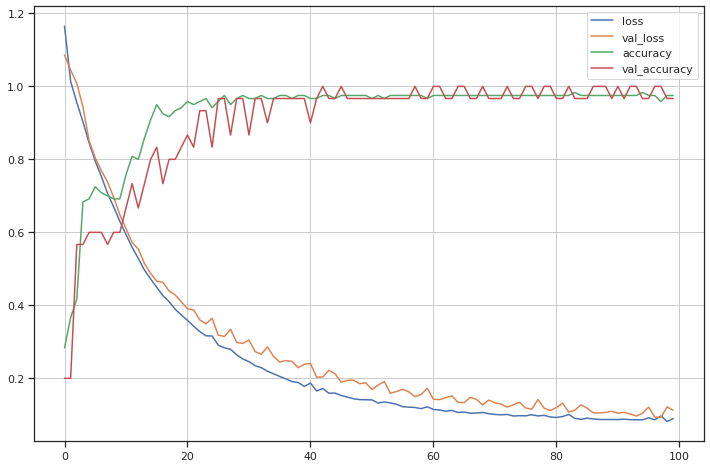

In [ ]:
# 정확도와 손실 확인
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(12,8))
plt.plot(hist.history['loss'])
plt.plot(hist.history['val_loss'])
plt.plot(hist.history['accuracy'])
plt.plot(hist.history['val_accuracy'])
plt.legend(['loss','val_loss', 'accuracy','val_accuracy'])
plt.grid()
plt.show()

In [ ]:
# 결과
loss, accuracy = model.evaluate(X_test, y_test)
print("Accuracy = {:.2f}".format(accuracy))

1/1 [==============================] - 0s 2ms/step - loss: 0.1123 - accuracy: 0.9667
Accuracy = 0.97


정확도 : 97%

In [ ]:
# 예측
predictions = model.predict(X_test)

# 3. CNN 문제: CIFAR-10 분류(반드시 CNN 사용해 딥러닝 처리)

CIFAR-10 dataset은 32x32픽셀의 60000개 컬러이미지가 포함되어있으며, 각 이미지는 10개의 클래스로 라벨링

60000개 중, 50000개 이미지는 트레이닝 10000개 이미지는 테스트용도



In [ ]:
# 필요 임포트
import numpy as np
import os
os.environ["THEANO_FLAGS"] = "mode=FAST_RUN,device=cuda*,floatX=float32"
import theano
import keras

from keras.datasets import cifar10
from keras.models  import Sequential
from keras.layers import Dense, Dropout, Activation, Flatten
from keras.layers import Conv2D, MaxPooling2D
from keras.regularizers import l2
from keras.utils import np_utils
from keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
%matplotlib inline
from pylab import rcParams
rcParams['figure.figsize'] = 20, 20

In [ ]:
#cifar10에서 데이터를 로드
#from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

print ("Training data:")
print ("Number of examples: ", X_train.shape[0])
print ("Number of channels:",X_train.shape[3]) 
print ("Image size:", X_train.shape[1], X_train.shape[2])
print
print ("Test data:")
print ("Number of examples:", X_test.shape[0])
print ("Number of channels:", X_test.shape[3])
print ("Image size:", X_test.shape[1], X_test.shape[2]) 

170500096/170498071 [==============================] - 2s 0us/step
Training data:
Number of examples:  50000
Number of channels: 3
Image size: 32 32
Test data:
Number of examples: 10000
Number of channels: 3
Image size: 32 32


 5만장의 이미지와 테스트에 사용할 1만장의 이미지(32x32, 3channel)가 로드

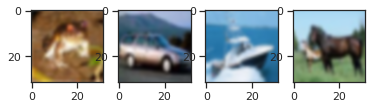

In [ ]:
# 이미지 출력 테스트
plt.subplot(141)
plt.imshow(X_train[0], interpolation="bicubic")
plt.grid(False)
plt.subplot(142)
plt.imshow(X_train[4], interpolation="bicubic")
plt.grid(False)
plt.subplot(143)
plt.imshow(X_train[8], interpolation="bicubic")
plt.grid(False)
plt.subplot(144)
plt.imshow(X_train[12], interpolation="bicubic")
plt.grid(False)
plt.show()

**데이터 정규화**
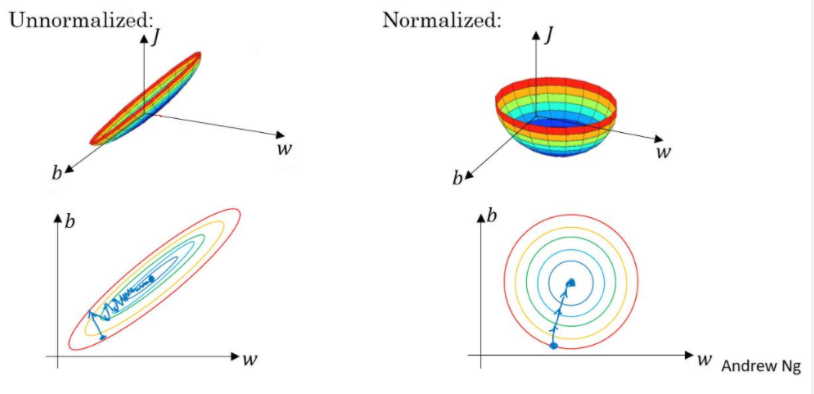

정규화를 하지 않으면 learning Rate를 매우 작게 해야 학습할 수 있음

만약 작지 않으면 불균형이 발생하여 Gradient Descent 알고리즘 적용 어려움

--> 정규화하면 Gradient Descent 적용하여 쉽고 빠르게 최적화 지점 찾을 수 있음

** 크게 두 가지 방법
1. Normalization(Min/Max):
전체 구간을 [0,1]로 맞춰줌

2. Standardization
original data : 정규화 하기 전의 데이터 분포

zero-centered data : 원 데이터에 평균을 뺌. 이로써 데이터의 분포가 가운데에 모이게 됨

normalized data : 표준편차를 나눠줌으로써 데이터의 분포가 일정해지는 효과 (가로 세로 길이가 같아짐)



In [ ]:
# Standardization을 이용하여 데이터 정규화 
print ("mean before normalization:", np.mean(X_train)) 
print ("std before normalization:", np.std(X_train))

mean=[0,0,0]
std=[0,0,0]
newX_train = np.ones(X_train.shape)
newX_test = np.ones(X_test.shape)
#train set에 있는 데이터로만 평균과 표준편차를 구함
for i in range(3):
    mean[i] = np.mean(X_train[:,:,:,i])
    std[i] = np.std(X_train[:,:,:,i])

#train과 test셋 모두 정규화 작업    
for i in range(3):
    newX_train[:,:,:,i] = X_train[:,:,:,i] - mean[i]
    newX_train[:,:,:,i] = newX_train[:,:,:,i] / std[i]
    newX_test[:,:,:,i] = X_test[:,:,:,i] - mean[i]
    newX_test[:,:,:,i] = newX_test[:,:,:,i] / std[i]
        
X_train = newX_train
X_test = newX_test

print ("mean after normalization:", np.mean(X_train))
print ("std after normalization:", np.std(X_train))
print(X_train.max())

mean before normalization: 120.70756512369792
std before normalization: 64.1500758911213
mean after normalization: 4.91799193961621e-17
std after normalization: 0.9999999999999996
2.126789409516928


In [ ]:
# 훈련
batchSize = 512            #훈련 batch크기
num_classes = 10           #CIFAR-10 dataset의 클래스 수
num_epochs = 50            #훈련 횟수 
learningRate= 0.001        #네트워크 학습률
lr_weight_decay = 0.95     #학습 weight감소률. epoch한 후 learn rate 0.95 줄음

Y_train = np_utils.to_categorical(y_train, num_classes)
Y_test = np_utils.to_categorical(y_test, num_classes)

In [ ]:
# 모델 구현
from keras import initializers
import copy

img_rows = 32              
img_cols = 32 

result = {}
y = {}
loss = []
acc = []
dropouts = [0.0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9]
for dropout in dropouts:
    print ("Dropout: ", (dropout))
    model = Sequential()

    #-- layer 1
    model.add(Conv2D(64, (3, 3),
                            padding='same',
                            activation='relu',
                            input_shape=(img_rows, img_cols,3)))
    model.add(Dropout(dropout))  
    model.add(Conv2D(64, 3, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout))
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 2
    model.add(Conv2D(128, 3, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout))                                        
    model.add(MaxPooling2D(pool_size=(2, 2)))

    ##--layer 3                         
    model.add(Conv2D(256, 3, 3, activation='relu',padding='same'))
    model.add(Dropout(dropout)) 
    model.add(MaxPooling2D(pool_size=(1, 1)))

    ##-- layer 4
    model.add(Flatten())
    model.add(Dense(512, activation='relu'))

    #-- layer 5
    model.add(Dense(512, activation='relu'))

    #-- layer 6
    model.add(Dense(num_classes, activation='softmax'))
    
    model.compile(loss='categorical_crossentropy',
                  optimizer='sgd',
                  metrics=['accuracy'])
    
    model_cce = model.fit(X_train, Y_train, batch_size=batchSize, epochs=num_epochs, verbose=1, shuffle=True, validation_data=(X_test, Y_test))
    score = model.evaluate(X_test, Y_test, verbose=0)
    y[dropout] = model.predict(X_test)
    print('Test score:', score[0])
    print('Test accuracy:', score[1])
    result[dropout] = copy.deepcopy(model_cce.history)   
    loss.append(score[0])
    acc.append(score[1])

Dropout:  0.0
Epoch 1/50
98/98 [==============================] - 132s 1s/step - loss: 2.3010 - accuracy: 0.1099 - val_loss: 2.2995 - val_accuracy: 0.1239
Epoch 2/50
98/98 [==============================] - 130s 1s/step - loss: 2.2981 - accuracy: 0.1490 - val_loss: 2.2963 - val_accuracy: 0.1769
Epoch 3/50
98/98 [==============================] - 130s 1s/step - loss: 2.2946 - accuracy: 0.1947 - val_loss: 2.2922 - val_accuracy: 0.1981
Epoch 4/50
98/98 [==============================] - 130s 1s/step - loss: 2.2896 - accuracy: 0.2056 - val_loss: 2.2862 - val_accuracy: 0.2029
Epoch 5/50
98/98 [==============================] - 130s 1s/step - loss: 2.2821 - accuracy: 0.2065 - val_loss: 2.2765 - val_accuracy: 0.2001
Epoch 6/50
98/98 [==============================] - 132s 1s/step - loss: 2.2696 - accuracy: 0.2042 - val_loss: 2.2598 - val_accuracy: 0.2025
Epoch 7/50
49/98 [==============>...............] - ETA: 1:02 - loss: 2.2547 - accuracy: 0.2043

In [ ]:
# 정확도
import numpy as np                                                               
import matplotlib.pyplot as plt

width = 0.1

plt.bar(dropouts, acc, width, align='center')

plt.tick_params(axis='both', which='major', labelsize=35)
plt.tick_params(axis='both', which='minor', labelsize=35)

plt.ylabel('Accuracy',size = 30)
plt.xlabel('Dropout', size = 30)
plt.show()

In [ ]:
# 손실
import numpy as np                                                               
import matplotlib.pyplot as plt

width = 0.1

plt.bar(dropouts, loss, width, align='center',color = 'green')

plt.tick_params(axis='both', which='major', labelsize=35)
plt.tick_params(axis='both', which='minor', labelsize=35)

plt.ylabel('Loss',size = 30)
plt.xlabel('Dropout', size = 30)
plt.show()